# Convolutional Neural Network

make sure you have acces to the keras and tensorflow packages
```pip install keras``` & ```pip install tensorflow```

A Convolutional neural network is mainly used to categorize images. by copying the behavoir of the brain. the layers are capable of extracting features from images. CNN's have two components:
1. The hidden layers / feature extraction
2. The Classification layers

<img src="./images/architecture.png">

### Sources
[https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050](https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)

[https://keras.io/layers/convolutional/#conv2d](https://keras.io/layers/convolutional/#conv2d)

In [28]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import maxnorm

batch_size = 64
epochs = 20
num_classes = 10

# Setup the model
model = Sequential()

## Enable GPU Acceleration

### Software requirements
The following NVIDIA® software must be installed on your system:

1. [https://www.nvidia.com/Download/index.aspx?lang=en-us](NVIDIA® GPU drivers) —CUDA 9.0 requires 384.x or higher.
2. [https://developer.nvidia.com/cuda-zone](CUDA® Toolkit) —TensorFlow supports CUDA 9.0.
3. [https://docs.nvidia.com/cuda/cupti/](CUPTI) ships with the CUDA Toolkit.
4. [https://developer.nvidia.com/cudnn](cuDNN SDK) (>= 7.2)
5. (Optional) [https://developer.nvidia.com/nccl](NCCL 2.2) for multiple GPU support.
6. (Optional) [https://docs.nvidia.com/deeplearning/sdk/tensorrt-install-guide/index.html](TensorRT 4.0) to improve latency and throughput for inference on some models.


### installing gpu support tensorflow
Before we go any further we have to make sure we have libraries for gpu acceleration because this will speed up our processes allot.
At this point it is only possible for NVidia GPU's to use this tech because AMD GPU's don't support CUDA

```pip install tensorflow-gpu```


### Windows setup
See the [https://www.tensorflow.org/install/gpu#hardware_requirements](hardware requirements) and [https://www.tensorflow.org/install/gpu#software_requirements](software requirements) listed above. Read the [https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/](CUDA® install guide for Windows).

Make sure the installed NVIDIA software packages match the versions listed above. In particular, TensorFlow will not load without the ```cuDNN64_7.dll``` file. To use a different version, see the [https://www.tensorflow.org/install/source_windows](Windows build from source) guide.

Add the CUDA, CUPTI, and cuDNN installation directories to the ```%PATH%``` environmental variable. For example, if the CUDA Toolkit is installed to ```C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0``` and cuDNN to ```C:\tools\cuda```, update your ```%PATH%``` to match:

```cmd
SET PATH=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin;%PATH%
SET PATH=C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\extras\CUPTI\libx64;%PATH%
SET PATH=C:\tools\cuda\bin;%PATH%
```

In [2]:
# Verify that tensorflow and keras are running with GPU
from tensorflow.python.client import device_lib
from keras import backend as K

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3765963727577690122
]


# Hidden layers / Feature extraction
## Conv2D Layer
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If ```use_bias``` is True, a bias vector is created and added to the outputs. Finally, if ```activation``` is not ```None```, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument  
```input_shape ``` (tuple of integers, does not include the sample axis), e.g.  
```input_shape=(128, 128, 3)``` for 128x128 RGB pictures in  
```data_format="channels_last".```

<img src="./images/conv2d.png">

### Arguments
* __filters__: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
* __kernel_size__: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* __strides__: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any ```dilation_rate``` value != 1.
* __padding__: one of ```"valid"``` or ```"same"``` (case-insensitive). Note that ```"same"``` is slightly inconsistent across backends with  strides != 1.
* __data_format__: A string, one of ```"channels_last"``` or ```"channels_first"```. The ordering of the dimensions in the inputs.  ```"channels_last"``` corresponds to inputs with shape ```(batch, height, width, channels)``` while  ```"channels_first"``` corresponds to inputs with shape ```(batch, channels, height, width)```. It defaults to the  ```image_data_format``` value found in your Keras config file at ```~/.keras/keras.json.``` If you never set it, then it will be "channels_last".
* __dilation_rate__: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any ```dilation_rate value``` != 1 is incompatible with specifying any stride value != 1.
* __activation__: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: ```a(x) = x```).
* __use_bias__: Boolean, whether the layer uses a bias vector.
* __kernel_initializer__: Initializer for the ```kernel``` weights matrix.
* __bias_initializer__: Initializer for the bias vector.
* __kernel_regularizer__: Regularizer function applied to the ```kernel``` weights matrix.
* __bias_regularizer__: Regularizer function applied to the bias vector.
* __activity_regularizer__: Regularizer function applied to the output of the layer (its "activation").
* __kernel_constraint__: Constraint function applied to the kernel matrix.
* __bias_constraint__: Constraint function applied to the bias vector.

In [24]:
# Images fed into this model are 512x512 pixels with 3 channels (RGB)
image_input_shape  = (512,512,3)

# Add convolutional layer with 3x3x3 filter 32 times and a stride size of 1
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=image_input_shape,padding='same'))

## Activation Layer _(ReLU Layer)_

Rectified Linear Unit.

<img src="./images/relu.png">

With default values, it returns element-wise ```max(x, 0)```.

Otherwise, it follows: ```f(x) = max_value``` for ```x >= max_value```, ```f(x) = x``` for ```threshold <= x < max_value, f(x) = alpha * (x - threshold)``` otherwise.

### Arguments

* __activation__: name of activation function to use, or alternatively, a Theano or TensorFlow operation.

In [25]:
# Add relu activation to the layer 
model.add(Activation('relu'))

## Pooling Layer

Max pooling operation for spatial data.
Pooling is a non linear form of downsizing.
Max pooling takes the max value from a certain range and drop all others as seen in de image below.

<img src="./images/pooling.png">

### Arguments

* __pool_size__: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions.
* __strides__: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to ```pool_size```.
* __padding__: One of ```"valid"``` or ```"same"``` (case-insensitive).
* __data_format__: A string, one of ```channels_last``` (default) or ```channels_first```. The ordering of the dimensions in the inputs.  ```channels_last``` corresponds to inputs with shape  ```(batch, height, width, channels)``` while ```channels_first``` corresponds to inputs with shape  ```(batch, channels, height, width)```. It defaults to the  ```image_data_format``` value found in your Keras config file at ```~/.keras/keras.json```. If you never set it, then it will be "channels_last".

In [26]:
#Pooling
model.add(MaxPooling2D(2))

# Classification Layers
## Flatten Layer

Flattens the input. Does not affect the batch size.

<img src="./images/flatten.png">

### Arguments

* __data_format__: A string, one of ```channels_last``` (default) or ```channels_first```. The ordering of the dimensions in the inputs. The purpose of this argument is to preserve weight ordering when switching a model from one data format to another.  ```channels_last``` corresponds to inputs with shape  ```(batch, ..., channels)``` while  ```channels_first``` corresponds to inputs with shape ```(batch, channels, ...)```. It defaults to the ```image_data_format``` value found in your Keras config file at  ```~/.keras/keras.json```. If you never set it, then it will be "channels_last".

### Example

```Python
model = Sequential()
model.add(Conv2D(64, (3, 3),
                 input_shape=(3, 32, 32), padding='same',))
# now: model.output_shape == (None, 64, 32, 32)

model.add(Flatten())
# now: model.output_shape == (None, 65536)
```

In [27]:
# Use Flatten to convert 3D data to 1D
model.add(Flatten())

## Dense Layers

Just your regular densely-connected NN layer.

```Dense``` implements the operation: ```output = activation(dot(input, kernel) + bias)``` where ```activation``` is the element-wise activation function passed as the ```activation``` argument, ```kernel``` is a weights matrix created by the layer, and ```bias``` is a bias vector created by the layer (only applicable if ```use_bias``` is ```True```).

```Dense``` is the only actual network layer in that model.

```Dense``` layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.

It's the most basic layer in neural networks.

```Dense(10)``` has ten neurons. A ```Dense(512)``` has 512 neurons.

Note: if the input to the layer has a rank greater than 2, then it is flattened prior to the initial dot product with ```kernel```.

### Arguments

* __units__: Positive integer, dimensionality of the output space.
* __activation__: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: ```a(x) = x)```.
* __use_bias__: Boolean, whether the layer uses a bias vector.
* __kernel_initializer__: Initializer for the ```kernel``` weights matrix.
* __bias_initializer__: Initializer for the bias vector.
* __kernel_regularizer__: Regularizer function applied to the ```kernel``` weights matrix.
* __bias_regularizer__: Regularizer function applied to the bias vector.
* __activity_regularizer__: Regularizer function applied to the output of the layer (its "activation").
* __kernel_constraint__: Constraint function applied to the ```kernel``` weights matrix.
* __bias_constraint__: Constraint function applied to the bias vector.

### Example
```Python
# as first layer in a sequential model:
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))
```

In [28]:
# Add dense layer with 10 neurons
model.add(Dense(10))

## Activation Layer (Softmax Layer)

Softmax activation function.

<img src="./images/softmax.png">

produces just the result of applying the softmax function to an input tensor. The softmax "squishes" the inputs so that ```sum(input) = 1;``` it's a way of normalizing. The shape of output of a softmax is the same as the input - it just normalizes the values. The outputs of softmax can be interpreted as probabilities.

### Arguments

* __activation__: name of activation function to use, or alternatively, a Theano or TensorFlow operation.

In [29]:
# we use the softmax activation function for our last layer
model.add(Activation('softmax'))

In [30]:
# give an overview of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 512, 512, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 512, 512, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2097152)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20971530  
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 20,972,426
Trainable params: 20,972,426
Non-trainable params: 0
________________________________________________________________

# Training

Training a CNN works in the same way as a regular neural network, using backpropagration or gradient descent. However, here this is a bit more mathematically complex because of the convolution operations.

In [12]:
# Before the training process, we have to put together a learning process in a particular form. 
# It consists of 3 elements: an optimiser, a loss function and a metric.

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Testing with sample dataset

In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


## Load Dataset

in this instance we will use the fashion dataset from the tensorflow tutorials
[https://www.tensorflow.org/tutorials/keras/basic_classification](https://www.tensorflow.org/tutorials/keras/basic_classification)

In [22]:
# dataset import
from keras.datasets import cifar10

(train_imgs, train_lbls), (test_imgs, test_lbls) = cifar10.load_data()

train_data = train_imgs
test_data = test_imgs

# labels for end results
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 100 # repeat 100 times

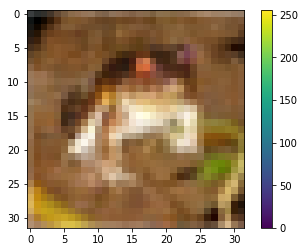

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

## Preproccesing the data

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

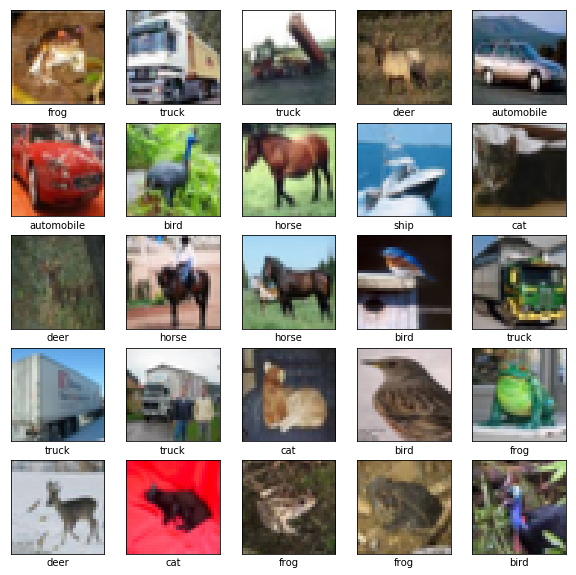

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

## Normalizing the data

In [25]:
# Convert and pre-processing
 
train_lbls = np_utils.to_categorical(train_lbls, num_classes)
test_lbls = np_utils.to_categorical(test_lbls, num_classes)
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs  /= 255
test_imgs /= 255

In [26]:
# exploring the train data
print('Train data')
print(train_imgs.shape)
print(len(train_lbls))
print(train_lbls)

# exploring the test data
print('\nTest data')
print(test_imgs.shape)
print(len(test_lbls))
print(test_lbls)

Train data
(50000, 32, 32, 3)
50000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

Test data
(10000, 32, 32, 3)
10000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## Building test model

In [37]:
# Setup the model
model = keras.Sequential([
    # feature extraction layers
    keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", input_shape=train_imgs.shape[1:], activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # hidden layers
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu, kernel_constraint=maxnorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [39]:
# train the model
model.fit(train_imgs, train_lbls, epochs=epochs)

Epoch 1/20
50000/50000 [==============================] - 301s 6ms/step - loss: 1.6346 - acc: 0.3930
Epoch 2/20
50000/50000 [==============================] - 287s 6ms/step - loss: 1.1318 - acc: 0.5946
Epoch 3/20
50000/50000 [==============================] - 285s 6ms/step - loss: 0.9563 - acc: 0.6619
Epoch 4/20
50000/50000 [==============================] - 281s 6ms/step - loss: 0.8466 - acc: 0.7036 5
Epoch 5/20
50000/50000 [==============================] - 280s 6ms/step - loss: 0.7647 - acc: 0.7296 2s - loss: 0.7
Epoch 6/20
50000/50000 [==============================] - 280s 6ms/step - loss: 0.6977 - acc: 0.7555 0s - loss: 0.6974 - acc: 0.7
Epoch 7/20
50000/50000 [==============================] - 280s 6ms/step - loss: 0.6505 - acc: 0.7691 7s - loss: 0.6 - ETA: 4s -
Epoch 8/20
50000/50000 [==============================] - 280s 6ms/step - loss: 0.6103 - acc: 0.7831
Epoch 9/20
50000/50000 [==============================] - 280s 6ms/step - loss: 0.5705 - acc: 0.7997 0s - loss: 0.5701 

In [40]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_imgs, test_lbls)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 13s 1ms/step
Test accuracy: 0.7587


## predictions

the prediction score describes the confidence of the model that the image corresponds to each of the 10 different articles of clothing

In [41]:
# make predictions
predictions = model.predict(test_imgs)

predictions[0]

array([2.1644369e-04, 2.4629250e-04, 7.5014576e-04, 7.5210822e-01,
       8.7654844e-06, 2.4288876e-01, 2.2206740e-03, 4.0908239e-04,
       1.1350858e-03, 1.6507794e-05], dtype=float32)

## Helper functions

these functions help visualize and check correct predictions

In [59]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

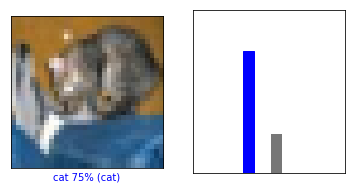

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels[:,0], test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels[:,0])

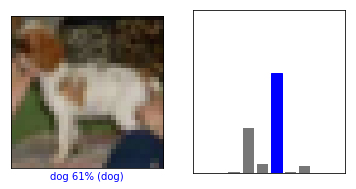

In [61]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels[:,0], test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels[:,0])

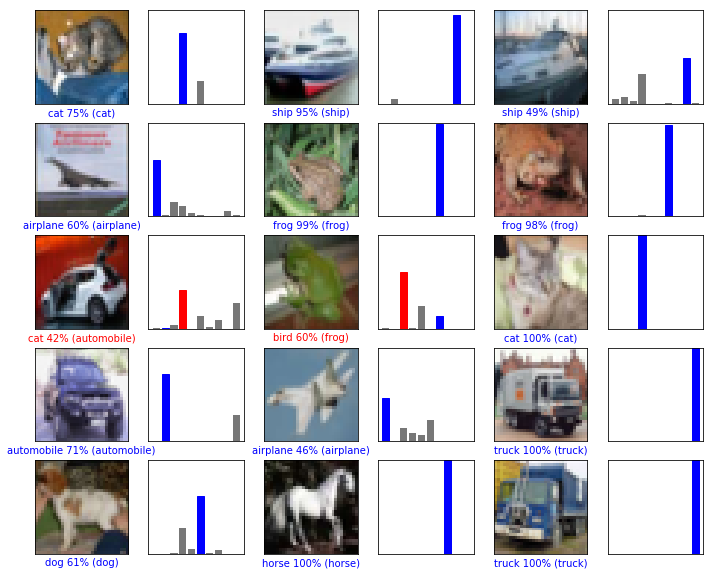

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels[:,0], test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels[:,0])

## Use of trained model

(32, 32, 3)
(1, 32, 32, 3)
[[2.1644372e-04 2.4629230e-04 7.5014553e-04 7.5210834e-01 8.7654780e-06
  2.4288861e-01 2.2206765e-03 4.0908245e-04 1.1350859e-03 1.6507796e-05]]


3

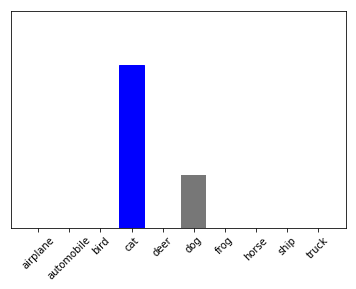

In [64]:
# Grab an image from the test dataset
img = test_imgs[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels[:,0])
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])